# XGBoost
In the following, four XGBoost models are set up, which are based on two different data sets. The first data set was calculated based on the PHQ 9 and a cut-off value of 8. The second data set is based on the PHQ SUM and a cut-off value of 21. In the first step, both models were run with all variables contained in the data sets. In the second step, a feature extraction was performed to reduce multicorrenality between the individual features.
Final conclusion and comparison in the file conclusion

load the necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectFromModel
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

Load the two datasets

In [ ]:
df_16_100=pd.read_csv('/content/drive/MyDrive/Daten ML/Threshold_21_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv', keep_default_na=True)

df_16_100.columns = [s.strip().replace(' ', '_') for s in df_16_100.columns]

df_16_100=df_16_100.dropna(axis=1)

df_16_50_1=df_16_100

df_8_100=pd.read_csv('/content/drive/MyDrive/Daten ML/Threshold_8_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv', keep_default_na=True)

df_8_100.columns = [s.strip().replace(' ', '_') for s in df_8_100.columns]

df_8_100=df_8_100.dropna(axis=1)

df_8_50_1=df_8_100

#Dataset 1 PHQ SUM TH 21 without Feature Extraction
Hyperparemter Tuning Hyperparameter Tuning for the first Dataset using the range function in the parameter distribution for more different parameter constellations

{'subsample': 0.7, 'n_estimators': 1300, 'min_child_weight': 3, 'max_depth': 16, 'learning_rate': 0.051000000000000004, 'gamma': 0.3}
0.8443824207056279
Accuracy: 0.9166666666666666
Precision: 0.8387096774193549
Recall: 0.7428571428571429
F1 Score: 0.787878787878788
AUC-Wert: 0.9052094522019334


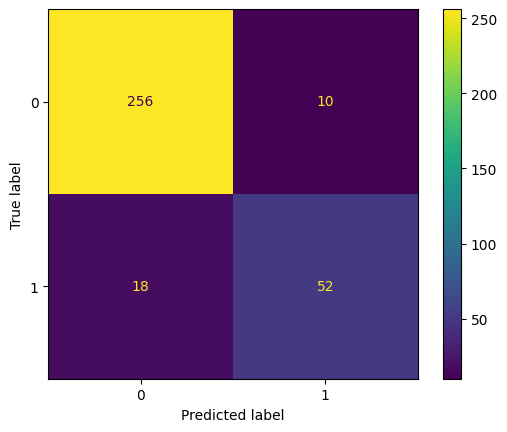

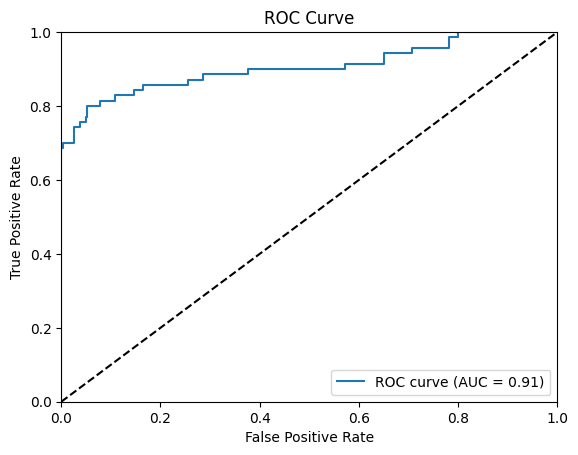

In [ ]:
feature_columns = [col for col in df_16_50_1.columns if 'FEATURE' in col]
X = df_16_50_1[feature_columns]
Y=df_16_50_1['Depression']

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

XGB2=XGBClassifier()

param_dist = {
    'n_estimators': range(50,2000,250),
    'max_depth': range(2,32,2),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

# define XGBClassifier
XBG2 = XGBClassifier(**best_parm)
#Train the Model
XBG2.fit(train_X, train_Y)

#Make predictions for Y based on the test data of X
pred_Y = XBG2.predict(test_X)

#Calculating the confusion Matrix
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

#Calculating the evaluation metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# calculate ROC-Curve

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]


auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")


fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Dataset 2: PHQ 9, TH 8 without Feature Extraction


{'subsample': 0.8, 'n_estimators': 1300, 'min_child_weight': 5, 'max_depth': 24, 'learning_rate': 0.051000000000000004, 'gamma': 0.1}
0.9399258570696967
Accuracy: 0.890625
Precision: 0.9259259259259259
Recall: 0.5681818181818182
F1 Score: 0.7042253521126761
AUC-Wert: 0.8783783783783784


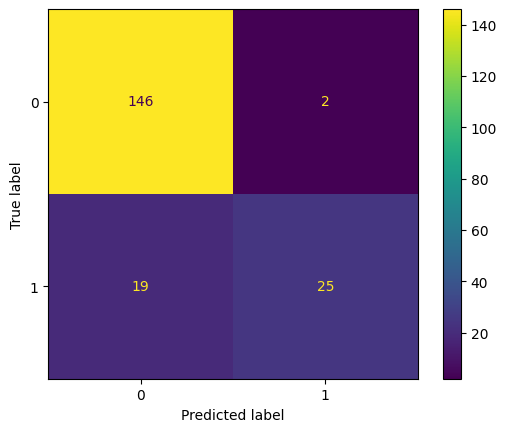

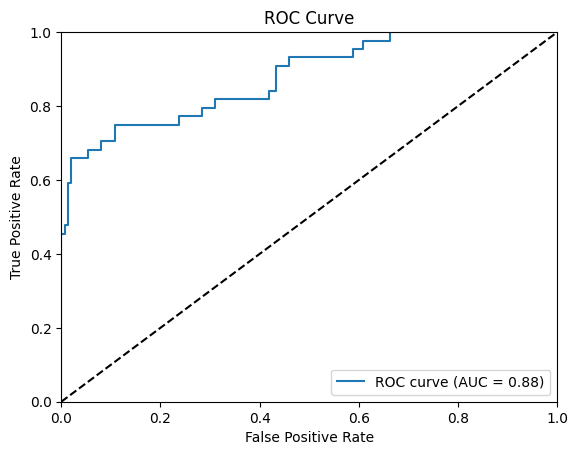

In [ ]:
XGB2=XGBClassifier()

param_dist = {
    'n_estimators': range(50,2000,250),
    'max_depth': range(2,32,2),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

# define XGBClassifier
XBG2 = XGBClassifier(**best_parm)
#Train the Model
XBG2.fit(train_X, train_Y)

#Make predictions for Y based on the test data of X
pred_Y = XBG2.predict(test_X)

#Calculating the confusion Matrix
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

#Calculating the evaluation metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# calculate ROC-Curve

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]


auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")


fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Generell Code for the  Feature Extraction

In [ ]:
#for better understanding I added the code from /Depression_Level_Classifier/feature_extraction.py instead of just calling it.

def extractor(df, threshold=0.9):
    """
    ************************************************************************
    EXPLANATIONS

    Filter features based on correlation threshold and visualize the correlation matrices.

    In practice a threshold of 0.9 is widespread but there exists more conservatve
    thresholds like 0.8 which is a more conservative approach. You may choose it
    depending on the context.

    ************************************************************************

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features.
    threshold (float): The correlation threshold to filter features. Default is 0.9.

    Returns:
    selected_features (list): List of features with correlation below the threshold.
    excluded_features (list): List of features with correlation above the threshold.
    """

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create lists for selected features ("normal correlations") and excluded features (perfectly/almost perfectly correlated)
    selected_features = []
    excluded_features = []

    # Run through the upper triangular matrix of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                excluded_features.append(colname)

    # fill lists of excluded and selected features
    excluded_features = list(set(excluded_features))
    selected_features = [feature for feature in corr_matrix.columns if feature not in excluded_features]

    # create correlation matrix of selected features
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

    # plot correlation matrix of selected features
    plt.figure(figsize=(12, 10))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

    # create correlation matrix of excluded features and plot it
    if excluded_features:
        remaining_corr_matrix = corr_matrix.loc[excluded_features, excluded_features]
        plt.figure(figsize=(20, 16))
        sns.heatmap(remaining_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Excluded Features')
        plt.show()
    else:
        print("No excluded features found.")

    # print lists of selected/excluded features
    print("Selected Features:", selected_features)
    print("Excluded Features:", excluded_features)


    # return lists of selected and excluded features
    return selected_features, excluded_features

#Feature Extraction for Dataset 1


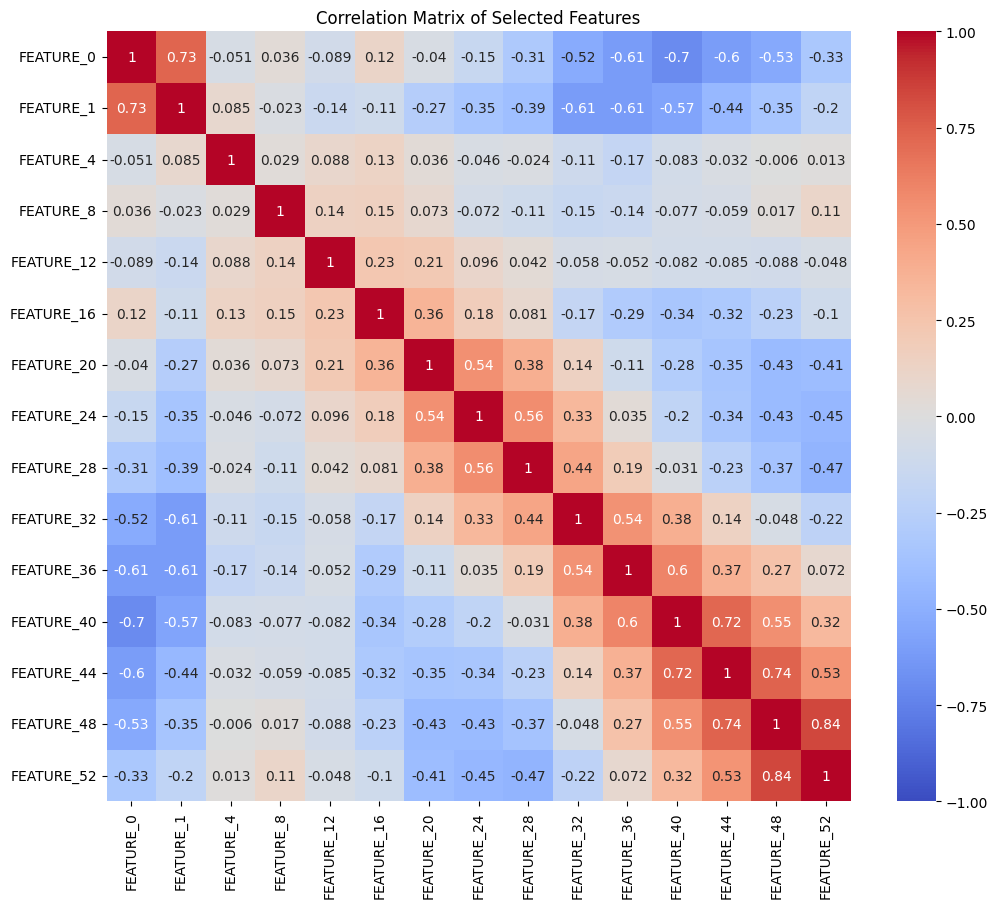

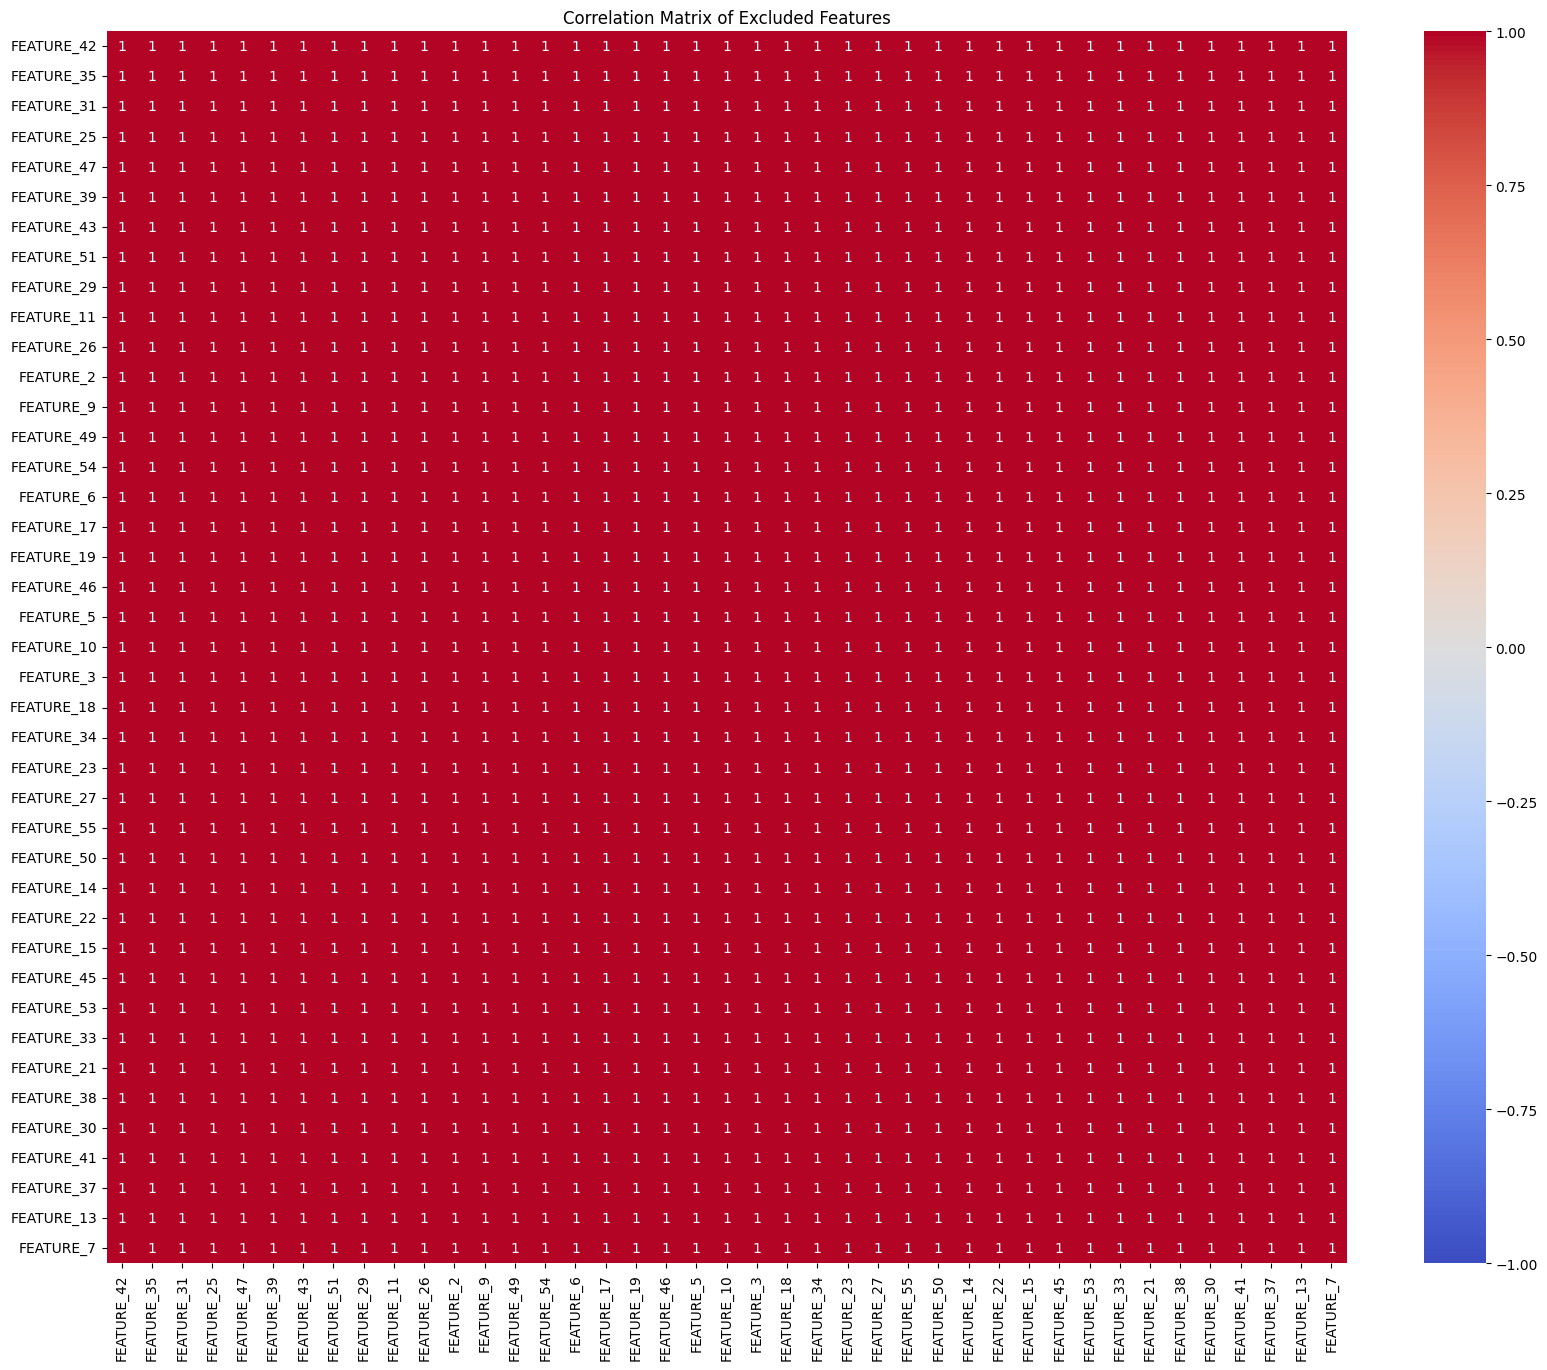

Selected Features: ['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_42', 'FEATURE_35', 'FEATURE_31', 'FEATURE_25', 'FEATURE_47', 'FEATURE_39', 'FEATURE_43', 'FEATURE_51', 'FEATURE_29', 'FEATURE_11', 'FEATURE_26', 'FEATURE_2', 'FEATURE_9', 'FEATURE_49', 'FEATURE_54', 'FEATURE_6', 'FEATURE_17', 'FEATURE_19', 'FEATURE_46', 'FEATURE_5', 'FEATURE_10', 'FEATURE_3', 'FEATURE_18', 'FEATURE_34', 'FEATURE_23', 'FEATURE_27', 'FEATURE_55', 'FEATURE_50', 'FEATURE_14', 'FEATURE_22', 'FEATURE_15', 'FEATURE_45', 'FEATURE_53', 'FEATURE_33', 'FEATURE_21', 'FEATURE_38', 'FEATURE_30', 'FEATURE_41', 'FEATURE_37', 'FEATURE_13', 'FEATURE_7']


(['FEATURE_0',
  'FEATURE_1',
  'FEATURE_4',
  'FEATURE_8',
  'FEATURE_12',
  'FEATURE_16',
  'FEATURE_20',
  'FEATURE_24',
  'FEATURE_28',
  'FEATURE_32',
  'FEATURE_36',
  'FEATURE_40',
  'FEATURE_44',
  'FEATURE_48',
  'FEATURE_52'],
 ['FEATURE_42',
  'FEATURE_35',
  'FEATURE_31',
  'FEATURE_25',
  'FEATURE_47',
  'FEATURE_39',
  'FEATURE_43',
  'FEATURE_51',
  'FEATURE_29',
  'FEATURE_11',
  'FEATURE_26',
  'FEATURE_2',
  'FEATURE_9',
  'FEATURE_49',
  'FEATURE_54',
  'FEATURE_6',
  'FEATURE_17',
  'FEATURE_19',
  'FEATURE_46',
  'FEATURE_5',
  'FEATURE_10',
  'FEATURE_3',
  'FEATURE_18',
  'FEATURE_34',
  'FEATURE_23',
  'FEATURE_27',
  'FEATURE_55',
  'FEATURE_50',
  'FEATURE_14',
  'FEATURE_22',
  'FEATURE_15',
  'FEATURE_45',
  'FEATURE_53',
  'FEATURE_33',
  'FEATURE_21',
  'FEATURE_38',
  'FEATURE_30',
  'FEATURE_41',
  'FEATURE_37',
  'FEATURE_13',
  'FEATURE_7'])

In [ ]:
feature_columns = [col for col in df_16_50_1.columns if 'FEATURE' in col]
X = df_16_50_1[feature_columns]
Y=df_16_50_1['Depression']
extractor(X)

define X with the selected features

In [ ]:
X = X[['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']]



{'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 26, 'learning_rate': 0.051000000000000004, 'gamma': 1}
0.8320614215202156
Accuracy: 0.8988095238095238
Precision: 1.0
Recall: 0.5142857142857142
F1 Score: 0.6792452830188679
AUC-Wert: 0.8866809881847477


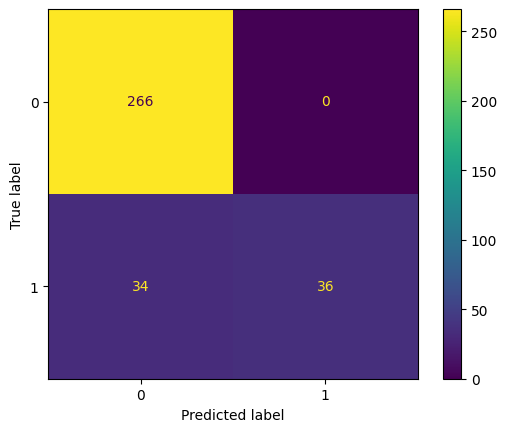

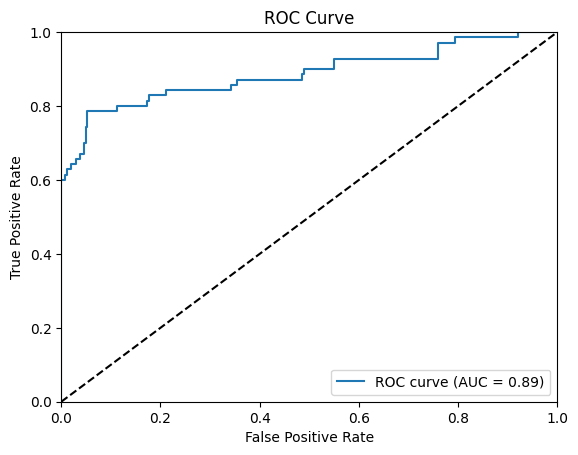

In [ ]:
#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

XGB2=XGBClassifier()

param_dist = {
    'n_estimators': range(50,2000,250),
    'max_depth': range(2,32,2),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

# define XGBClassifier
XBG2 = XGBClassifier(**best_parm)
#Train the Model
XBG2.fit(train_X, train_Y)

#Make predictions for Y based on the test data of X
pred_Y = XBG2.predict(test_X)

#Calculating the confusion Matrix
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

#Calculating the evaluation metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# calculate ROC-Curve

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]


auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")


fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Feature Extraction for Dataset 2


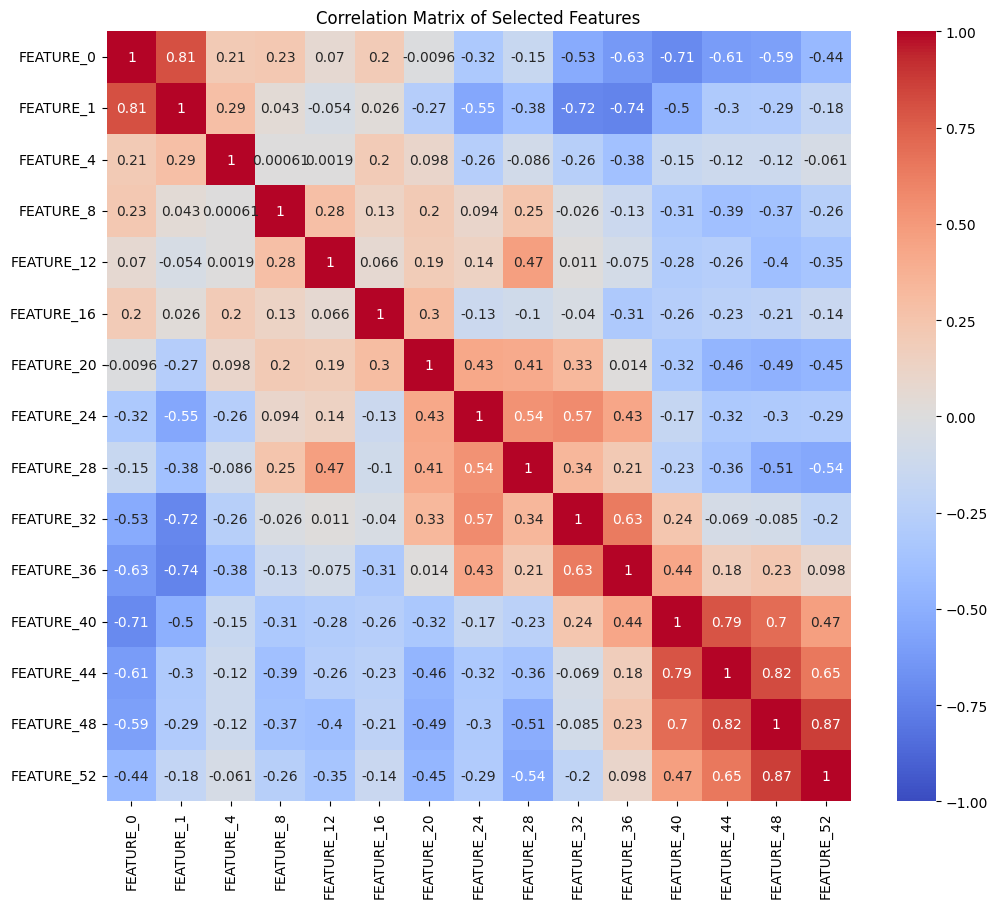

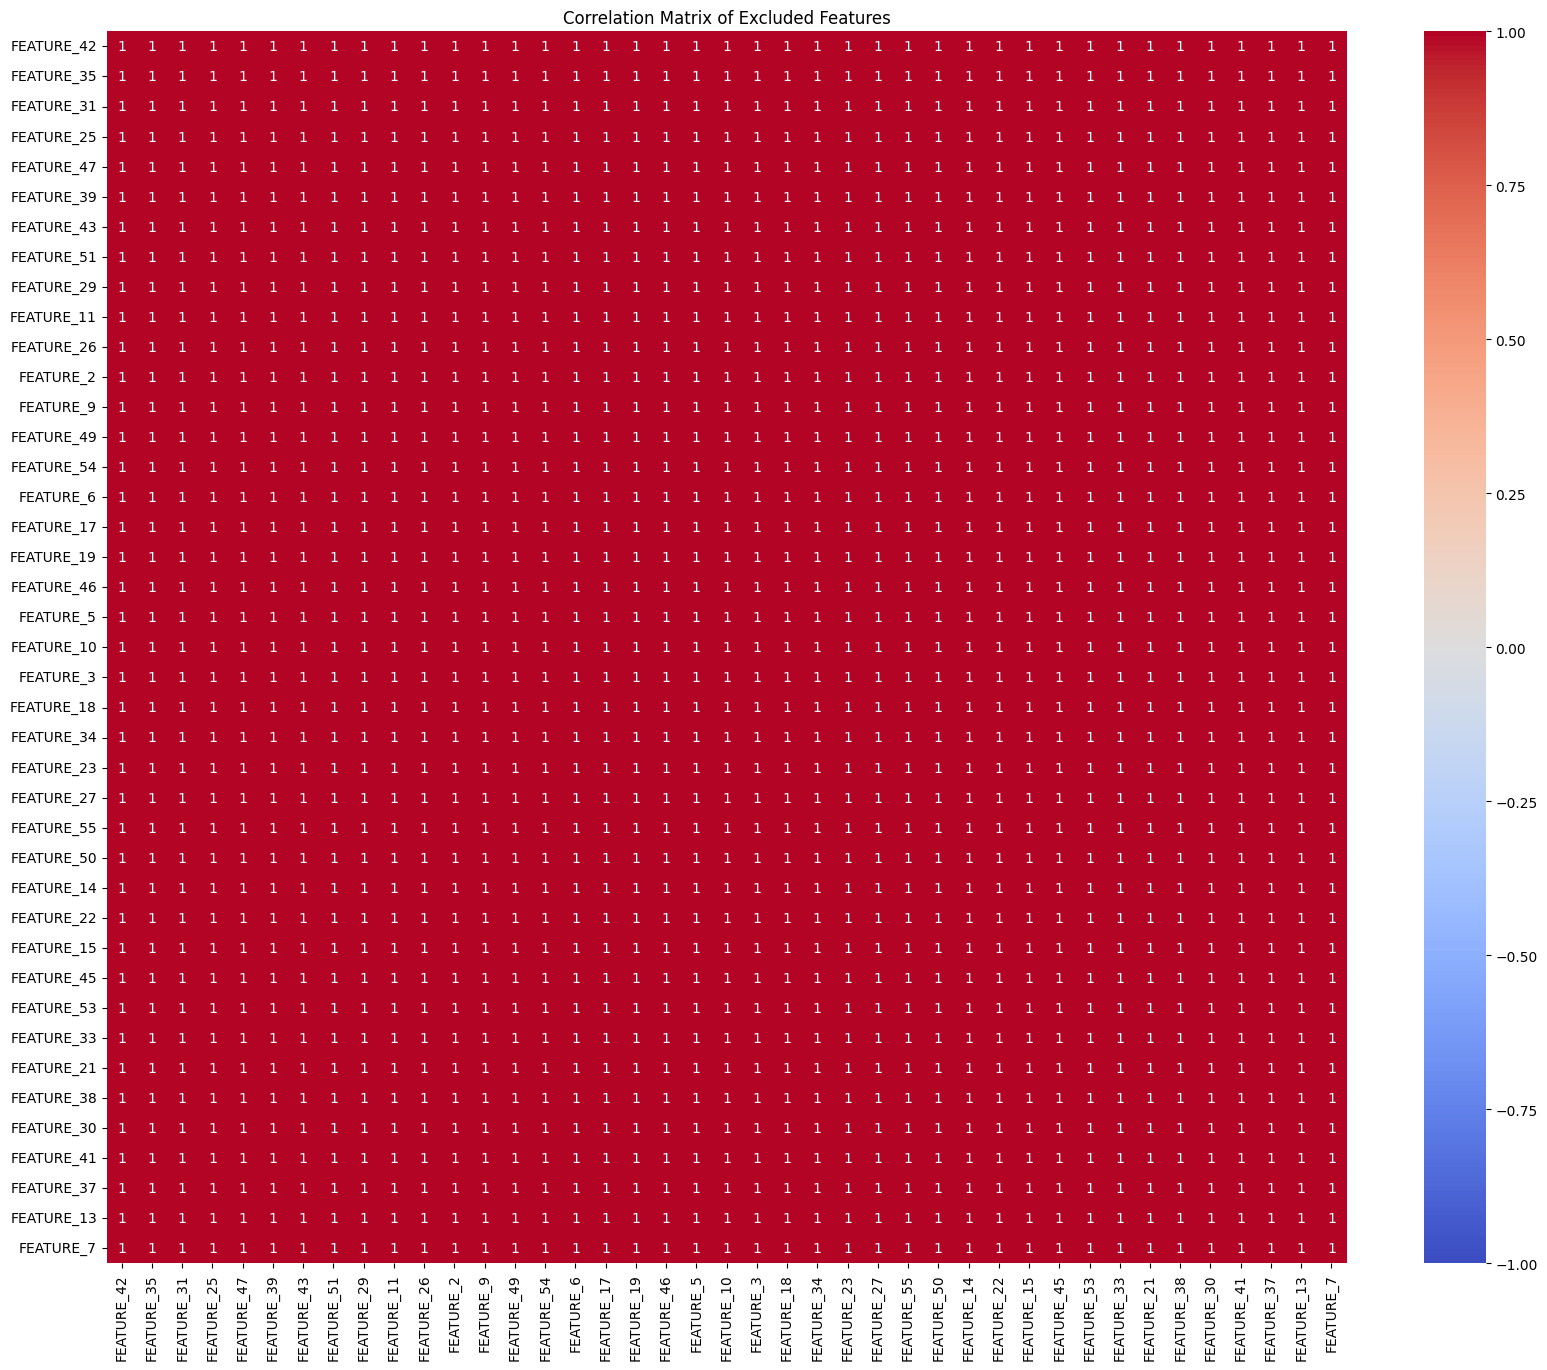

Selected Features: ['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_42', 'FEATURE_35', 'FEATURE_31', 'FEATURE_25', 'FEATURE_47', 'FEATURE_39', 'FEATURE_43', 'FEATURE_51', 'FEATURE_29', 'FEATURE_11', 'FEATURE_26', 'FEATURE_2', 'FEATURE_9', 'FEATURE_49', 'FEATURE_54', 'FEATURE_6', 'FEATURE_17', 'FEATURE_19', 'FEATURE_46', 'FEATURE_5', 'FEATURE_10', 'FEATURE_3', 'FEATURE_18', 'FEATURE_34', 'FEATURE_23', 'FEATURE_27', 'FEATURE_55', 'FEATURE_50', 'FEATURE_14', 'FEATURE_22', 'FEATURE_15', 'FEATURE_45', 'FEATURE_53', 'FEATURE_33', 'FEATURE_21', 'FEATURE_38', 'FEATURE_30', 'FEATURE_41', 'FEATURE_37', 'FEATURE_13', 'FEATURE_7']


(['FEATURE_0',
  'FEATURE_1',
  'FEATURE_4',
  'FEATURE_8',
  'FEATURE_12',
  'FEATURE_16',
  'FEATURE_20',
  'FEATURE_24',
  'FEATURE_28',
  'FEATURE_32',
  'FEATURE_36',
  'FEATURE_40',
  'FEATURE_44',
  'FEATURE_48',
  'FEATURE_52'],
 ['FEATURE_42',
  'FEATURE_35',
  'FEATURE_31',
  'FEATURE_25',
  'FEATURE_47',
  'FEATURE_39',
  'FEATURE_43',
  'FEATURE_51',
  'FEATURE_29',
  'FEATURE_11',
  'FEATURE_26',
  'FEATURE_2',
  'FEATURE_9',
  'FEATURE_49',
  'FEATURE_54',
  'FEATURE_6',
  'FEATURE_17',
  'FEATURE_19',
  'FEATURE_46',
  'FEATURE_5',
  'FEATURE_10',
  'FEATURE_3',
  'FEATURE_18',
  'FEATURE_34',
  'FEATURE_23',
  'FEATURE_27',
  'FEATURE_55',
  'FEATURE_50',
  'FEATURE_14',
  'FEATURE_22',
  'FEATURE_15',
  'FEATURE_45',
  'FEATURE_53',
  'FEATURE_33',
  'FEATURE_21',
  'FEATURE_38',
  'FEATURE_30',
  'FEATURE_41',
  'FEATURE_37',
  'FEATURE_13',
  'FEATURE_7'])

In [ ]:
feature_columns = [col for col in df_8_50_1.columns if 'FEATURE' in col]
X = df_8_50_1[feature_columns]
Y=df_8_50_1['Depression']
extractor(X)

{'subsample': 0.6, 'n_estimators': 550, 'min_child_weight': 2, 'max_depth': 26, 'learning_rate': 0.051000000000000004, 'gamma': 0.3}
0.9427802728601333
Accuracy: 0.9166666666666666
Precision: 0.868421052631579
Recall: 0.75
F1 Score: 0.8048780487804879
AUC-Wert: 0.9203009828009828


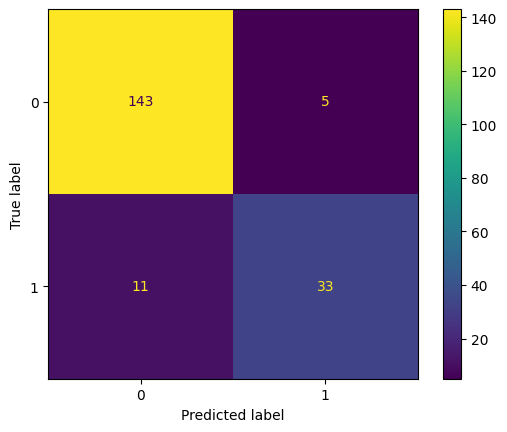

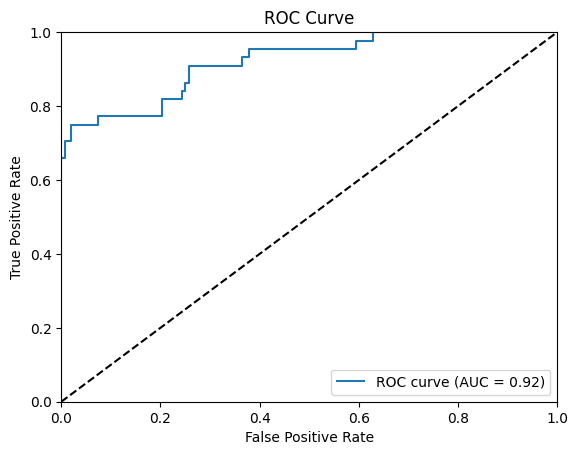

In [ ]:
X = X[['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']]
#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

XGB2=XGBClassifier()

param_dist = {
    'n_estimators': range(50,2000,250),
    'max_depth': range(2,32,2),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

# define XGBClassifier
XBG2 = XGBClassifier(**best_parm)
#Train the Model
XBG2.fit(train_X, train_Y)

#Make predictions for Y based on the test data of X
pred_Y = XBG2.predict(test_X)

#Calculating the confusion Matrix
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

#Calculating the evaluation metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# calculate ROC-Curve

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]


auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")


fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()